In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
data = pd.read_csv(r'/content/Mall_Customers.csv', encoding='latin-1')
df = pd.DataFrame(data)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Model 1

In [ ]:
X1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

In [ ]:
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters1 = kmeans1.fit_predict(X1_scaled)
df['Cluster_Without_Gender'] = clusters1

In [ ]:
silhouette1 = silhouette_score(X1_scaled, clusters1)
db_index1 = davies_bouldin_score(X1_scaled, clusters1)
print("Model 1 (Without Gender) Metrics:")
print(f"Silhouette Score: {silhouette1:.3f}")
print(f"Davies-Bouldin Index: {db_index1:.3f}")

Model 1 (Without Gender) Metrics:
Silhouette Score: 0.408
Davies-Bouldin Index: 0.889


In [ ]:
centroids1 = scaler1.inverse_transform(kmeans1.cluster_centers_)
centroids_df1 = pd.DataFrame(centroids1, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("\nModel 1 (Without Gender) Cluster Centroids:")
print(centroids_df1)


Model 1 (Without Gender) Cluster Centroids:
         Age  Annual Income (k$)  Spending Score (1-100)
0  55.275862           47.620690               41.706897
1  32.875000           86.100000               81.525000
2  25.769231           26.115385               74.846154
3  26.733333           54.311111               40.911111
4  44.387097           89.774194               18.483871


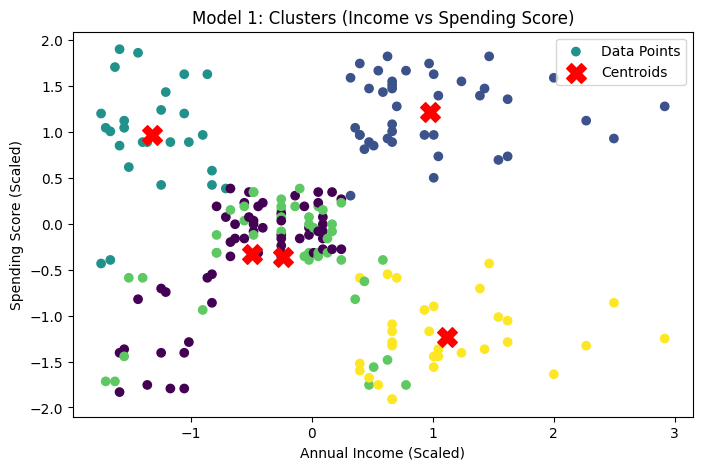

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X1_scaled[:, 1], X1_scaled[:, 2], c=clusters1, cmap='viridis', label='Data Points')
plt.scatter(kmeans1.cluster_centers_[:, 1], kmeans1.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.title('Model 1: Clusters (Income vs Spending Score)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

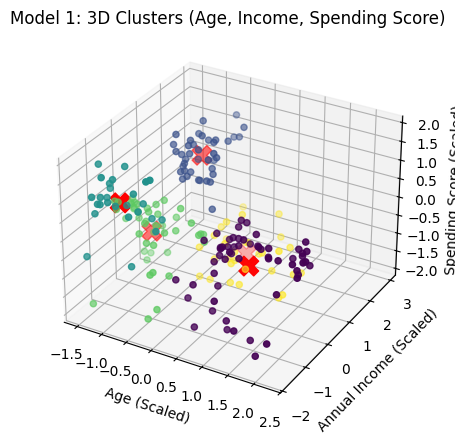

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1_scaled[:, 0], X1_scaled[:, 1], X1_scaled[:, 2], c=clusters1, cmap='viridis')
ax.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], kmeans1.cluster_centers_[:, 2], s=200, c='red', marker='X')
ax.set_title('Model 1: 3D Clusters (Age, Income, Spending Score)')
ax.set_xlabel('Age (Scaled)')
ax.set_ylabel('Annual Income (Scaled)')
ax.set_zlabel('Spending Score (Scaled)')
plt.show()

## Model 2

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
X2 = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

In [ ]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters2 = kmeans2.fit_predict(X2_scaled)
df['Cluster_With_Gender'] = clusters2

In [ ]:
silhouette2 = silhouette_score(X2_scaled, clusters2)
db_index2 = davies_bouldin_score(X2_scaled, clusters2)
print("\nModel 2 (With Gender) Metrics:")
print(f"Silhouette Score: {silhouette2:.3f}")
print(f"Davies-Bouldin Index: {db_index2:.3f}")


Model 2 (With Gender) Metrics:
Silhouette Score: 0.272
Davies-Bouldin Index: 1.181


## Model Comparison:

In [ ]:
print("\nModel Comparison:")
print(f"Model 1 (Without Gender) - Silhouette: {silhouette1:.3f}, Davies-Bouldin: {db_index1:.3f}")
print(f"Model 2 (With Gender) - Silhouette: {silhouette2:.3f}, Davies-Bouldin: {db_index2:.3f}")


Model Comparison:
Model 1 (Without Gender) - Silhouette: 0.408, Davies-Bouldin: 0.889
Model 2 (With Gender) - Silhouette: 0.272, Davies-Bouldin: 1.181


## Predict cluster for a new customer using Model 1

In [ ]:
new_customer_df = pd.DataFrame([[30, 50, 70]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
new_customer_scaled = scaler1.transform(new_customer_df)
predicted_cluster = kmeans1.predict(new_customer_scaled)[0]
print(f"Predicted Cluster for new customer: {predicted_cluster}")

Predicted Cluster for new customer: 2


In [ ]:
cluster_labels = {0: "Older Moderate Spenders",
                 1: "Young High Spenders",
                 2: "Young Moderate Spenders",
                 3: "Middle-Aged Low Spenders",
                 4: "Middle-Aged Average Spenders"}
df['Cluster_Label'] = df['Cluster_Without_Gender'].map(cluster_labels)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_Without_Gender  Cluster_With_Gender             Cluster_Label  
0                       2                    2   Young Moderate Spenders  
1                       2                    2   Young Moderate Spenders  
2                       3                    4  Middle-Aged Low Spenders  
3                       2                    4   Young Moderate Spenders  
4                       2                    4   Young Moderate Spenders  


In [ ]:
df.to_csv('Mall_Customers_with_Clusters.csv', index=False)